In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
import ast #converting column values to lists post-import from csv

from nltk import FreqDist

from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('data/recipe_data_w_target.csv')
df.head()

,Unnamed: 0,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms,target_tag,target_search_term,target
0,0,96313,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",1 (155 g),8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low...",False,False,0
1,1,232037,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",1 (366 g),4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}",False,True,0
2,3,60656,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",1 (244 g),4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}",True,False,0
3,4,232047,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",1 (358 g),8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'},True,True,1
4,5,232050,Hot Sweet Almond Brittle,This is one of our standard holiday gift recip...,"['slivered almonds', 'cider vinegar', 'sugar',...","[""12 ounces slivered almonds"",""1/4 cup ...",1 (832 g),1,['Preheat oven to 375°F Place almonds in sing...,"['time-to-make', 'course', 'preparation', 'des...",{'dessert'},False,False,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485306 entries, 0 to 485305
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           485306 non-null  int64 
 1   id                   485306 non-null  int64 
 2   name                 485306 non-null  object
 3   description          485306 non-null  object
 4   ingredients          485306 non-null  object
 5   ingredients_raw_str  485306 non-null  object
 6   serving_size         485306 non-null  object
 7   servings             485306 non-null  int64 
 8   steps                485306 non-null  object
 9   tags                 485306 non-null  object
 10  search_terms         485306 non-null  object
 11  target_tag           485306 non-null  bool  
 12  target_search_term   485306 non-null  bool  
 13  target               485306 non-null  int64 
dtypes: bool(2), int64(4), object(8)
memory usage: 45.4+ MB


In [6]:
def return_to_list(df, column_names):
    ''' Takes in list of names of columns containing strings and the dataframe they sit in and returns converts each column's contents into a new
    column, called '<original column name>_list', now as lists. May only work on strings that look like lists.... 
    
    Inputs:
    df = dataframe with columns being converted to lists
    column_names = list of columns whose contents need to be transformed
    
    Returns: updated dataframe
    '''
    for col in column_names:
        col_name = col + '_list'
        df[col_name] = [ast.literal_eval(x) for x in df[col] ]
    
    return df

In [7]:
col_to_list = ['ingredients', 'ingredients_raw_str', 'steps',
               'tags', 'search_terms']

In [8]:
df = return_to_list(df, col_to_list)

In [9]:
df['search_terms_list'] = df['search_terms_list'].apply(lambda x: list(x))

In [10]:
def lists_to_count(df, column, series = False):
    ''' takes in a column of lists and returns counts for all unique values. 
    
    Inputs:
    df - dataframe with column being converted
    column - column of lists
    series - if set to True returns pandas Series instead of a FreqDist object 
    
    Returns: 
    Series with unique value counts
    '''

    all_col = df[column].explode()
    col_count = FreqDist(all_col)
    
    if series:
        return pd.Series(dict(col_count))
    else:
        return col_count

# Counts  

Reviewing what's in the columns, creating some features along the way.

In [11]:
df['num_ingredients'] = df['ingredients_list'].apply(lambda x: len(x))
df['num_steps'] = df['steps_list'].apply(lambda x: len(x))
df['num_char_description'] = df['description'].apply(lambda x: len(x))


In [12]:
df.head()

,Unnamed: 0,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,...,target_search_term,target,ingredients_list,ingredients_raw_str_list,steps_list,tags_list,search_terms_list,num_ingredients,num_steps,num_char_description
0,0,96313,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",1 (155 g),8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...",...,False,0,"[water, grits, salt, cheddar cheese, garlic, o...","[4 cups water, 1 cup uncooked old fas...","[I a sauce pan, bring water to a boil; slowly ...","[time-to-make, course, main-ingredient, prepar...","[low-carb, vegetarian, diabetic, side, low-cal...",6,4,301
1,1,232037,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",1 (366 g),4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...",...,True,0,"[onion, red bell pepper, garlic cloves, large ...","[1 medium onion, chopped coarse , 1 med...","[In a food processor, pulse the onion, red pep...","[60-minutes-or-less, time-to-make, course, mai...","[dinner, shrimp]",13,10,138
2,3,60656,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",1 (244 g),4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...",...,False,0,"[zucchini, yellow squash, diced tomatoes, onio...","[2 zucchini, sliced , 2 small yello...",[Put all ingredients in the crock pot and cook...,"[weeknight, time-to-make, course, main-ingredi...","[italian, vegetarian, side]",9,1,57
3,4,232047,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",1 (358 g),8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",...,True,1,"[beef stew meat, flour, salt, allspice, cinnam...","[3 lbs beef stew meat, 3 tablespoons ...","[Preheat oven to 350°F., Cut beef into 1 inch ...","[time-to-make, course, main-ingredient, prepar...",[dinner],14,6,392
4,5,232050,Hot Sweet Almond Brittle,This is one of our standard holiday gift recip...,"['slivered almonds', 'cider vinegar', 'sugar',...","[""12 ounces slivered almonds"",""1/4 cup ...",1 (832 g),1,['Preheat oven to 375°F Place almonds in sing...,"['time-to-make', 'course', 'preparation', 'des...",...,False,0,"[slivered almonds, cider vinegar, sugar, sugar...","[12 ounces slivered almonds, 1/4 cup ...",[Preheat oven to 375°F Place almonds in singl...,"[time-to-make, course, preparation, desserts, ...",[dessert],8,4,164


In [13]:
ingredients_count = lists_to_count(df, 'ingredients_list', series = True).sort_values(ascending=False)
search_terms_count = lists_to_count(df, 'search_terms_list', series = True).sort_values(ascending=False)
tags_count = lists_to_count(df, 'tags_list', series = True).sort_values(ascending=False)

In [14]:
ingredients_count

salt                                   187669
butter                                 125909
sugar                                  107156
onion                                   82528
eggs                                    77441
                                        ...  
marzetti light blue cheese dressing         1
garlic melba toast rounds                   1
sugar free rocky road cookies               1
lime-infused oil                            1
black truffle juice                         1
Length: 18368, dtype: int64

Text(0.5, 1.0, '20 Most Popular Ingredients')

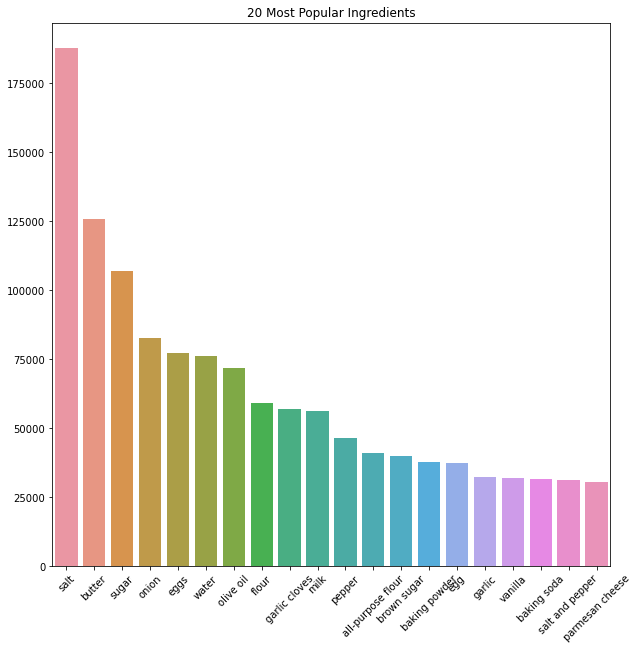

In [15]:

fig, ax = plt.subplots(figsize=(10,10))

# plotting the 20 most frequently used ingredients 
all_plot = sns.barplot(x=ingredients_count.index[:20], y=ingredients_count.values[:20], ax=ax)
plt.xticks(rotation=45);
plt.title('20 Most Popular Ingredients')

Text(0.5, 1.0, '% Recipies w/the 20 Most Popular Ingredients')

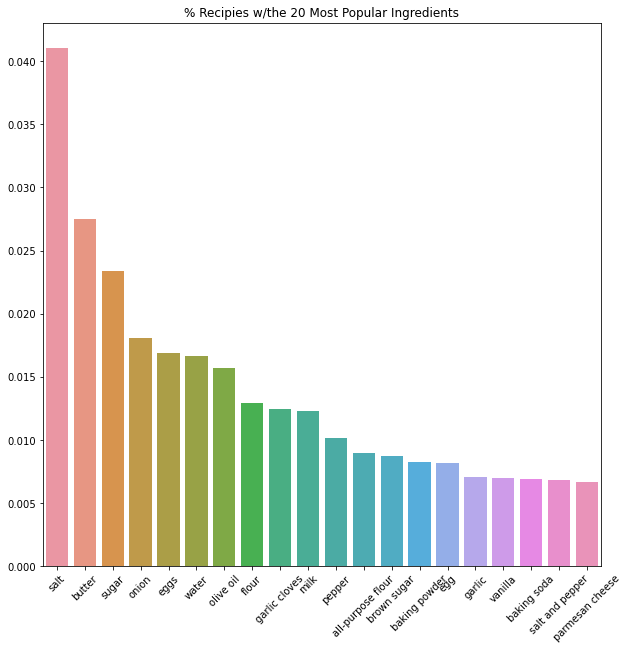

In [16]:

fig, ax = plt.subplots(figsize=(10,10))

# plotting the 20 most frequently used ingredients 
all_plot = sns.barplot(x=ingredients_count.index[:20], y=ingredients_count.values[:20]/ingredients_count.sum(),
                       ax=ax)
plt.xticks(rotation=45);
plt.title('% Recipies w/the 20 Most Popular Ingredients')

Text(0.5, 1.0, '20 Most Popular Search Terms')

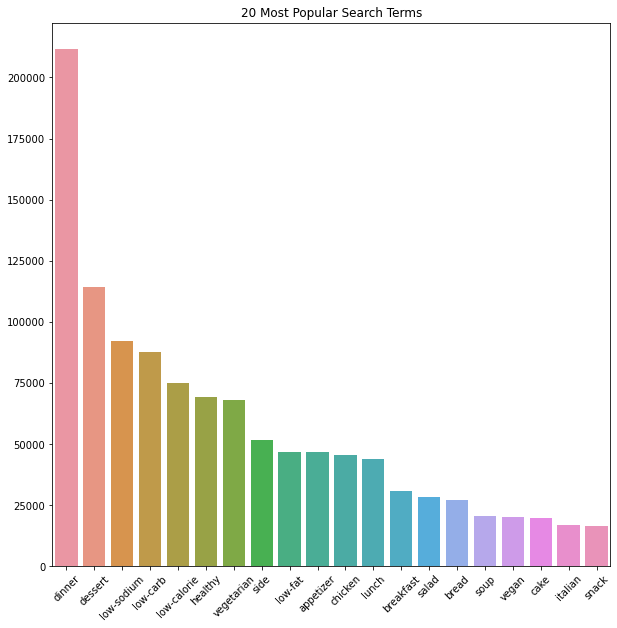

In [17]:
fig, ax = plt.subplots(figsize=(10,10))

# plotting the 20 most frequently used ingredients 
all_plot = sns.barplot(x=search_terms_count.index[:20], y=search_terms_count.values[:20], ax=ax)
plt.xticks(rotation=45);
plt.title('20 Most Popular Search Terms')

Text(0.5, 1.0, '% of Recipes Listed w/ 20 Most Popular Search Terms')

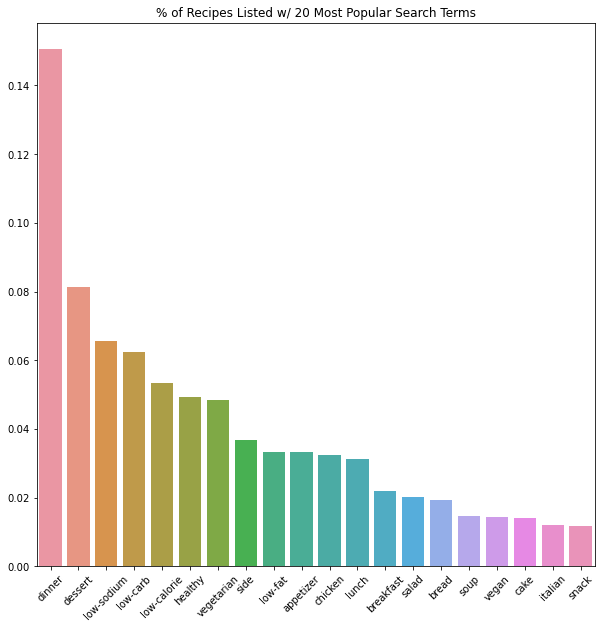

In [18]:

fig, ax = plt.subplots(figsize=(10,10))

# plotting the 20 most frequently used ingredients 
all_plot = sns.barplot(x=search_terms_count.index[:20], y=search_terms_count.values[:20]/search_terms_count.sum(), ax=ax)
plt.xticks(rotation=45);
plt.title('% of Recipes Listed w/ 20 Most Popular Search Terms')

Text(0.5, 1.0, '20 Most Popular Tags')

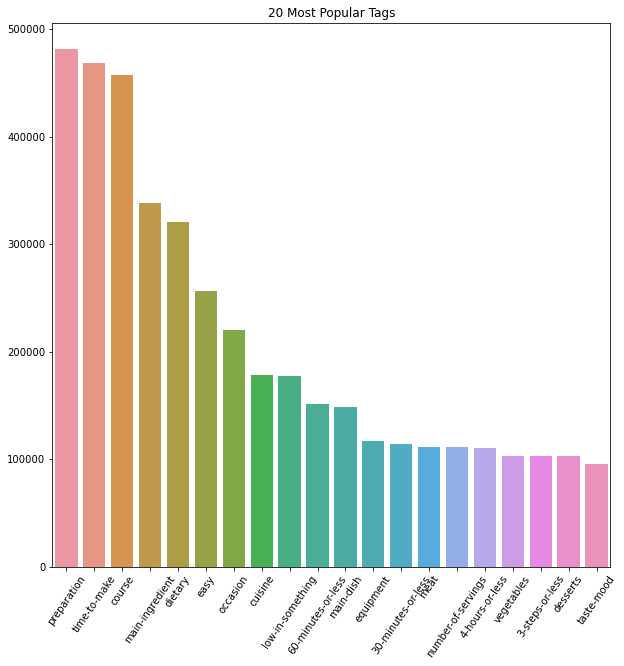

In [19]:

fig, ax = plt.subplots(figsize=(10,10))

# plotting the 20 most frequently used ingredients 
all_plot = sns.barplot(x=tags_count.index[:20], y=tags_count.values[:20], ax=ax)
plt.xticks(rotation=55);
plt.title('20 Most Popular Tags')

In [20]:
easy_ingredient_count = lists_to_count(df[df['target'] == 1], 'ingredients_list', series = True).sort_values(ascending=False)
not_easy_ingredient_count = lists_to_count(df[df['target'] == 0], 'ingredients_list', series = True).sort_values(ascending=False)


<ipython-input-21-f835a0e72603>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(easy_ingredient_count.index[:20])
<ipython-input-21-f835a0e72603>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(not_easy_ingredient_count.index[:20])


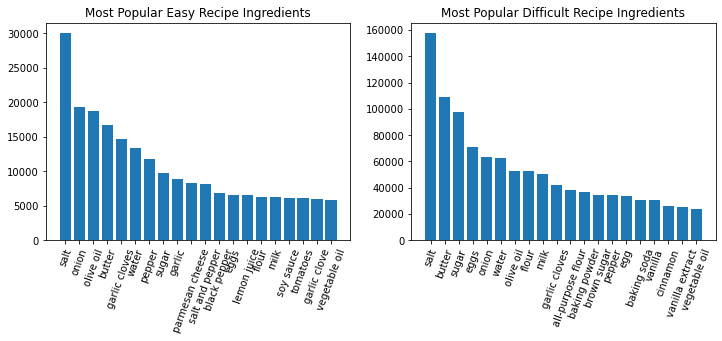

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax[0].bar(easy_ingredient_count.index[:20], easy_ingredient_count.values[:20])
ax[0].set_title('Most Popular Easy Recipe Ingredients')
ax[0].set_xticklabels(easy_ingredient_count.index[:20])
ax[0].tick_params(axis='x', labelrotation=70);

ax[1].bar(not_easy_ingredient_count.index[:20], not_easy_ingredient_count.values[:20])
ax[1].set_title('Most Popular Difficult Recipe Ingredients')
ax[1].set_xticklabels(not_easy_ingredient_count.index[:20])
ax[1].tick_params(axis='x', labelrotation=70);

In [22]:
easy_ingredient_count.sum()

883251

In [23]:
ingredients_count.sum()

4575936

# Baseline Model  

Need to make sure that you can't just predict the recipe outcome based on the pure numbers - of ingredients, steps, characters, etc...

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485306 entries, 0 to 485305
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Unnamed: 0                485306 non-null  int64 
 1   id                        485306 non-null  int64 
 2   name                      485306 non-null  object
 3   description               485306 non-null  object
 4   ingredients               485306 non-null  object
 5   ingredients_raw_str       485306 non-null  object
 6   serving_size              485306 non-null  object
 7   servings                  485306 non-null  int64 
 8   steps                     485306 non-null  object
 9   tags                      485306 non-null  object
 10  search_terms              485306 non-null  object
 11  target_tag                485306 non-null  bool  
 12  target_search_term        485306 non-null  bool  
 13  target                    485306 non-null  int64 
 14  ingr

In [25]:
# Creating a numbers only db

numbers_df = df[['num_ingredients','num_steps', 'num_char_description', 'target']]
numbers_df

,num_ingredients,num_steps,num_char_description,target
0,6,4,301,0
1,13,10,138,0
2,9,1,57,0
3,14,6,392,1
4,8,4,164,0
...,...,...,...,...
485301,9,10,61,0
485302,9,7,19,1
485303,10,8,115,0
485304,9,1,35,1


In [ ]:
# fig, ax = plt.subplots(figsize=(10,10))

# # plotting the 20 most frequently used ingredients 
# all_plot = sns.barplot(x=numbers_df['target'], y=tags_count.values[:20], ax=ax)
# plt.xticks(rotation=55);
# plt.title('20 Most Popular Tags')

In [ ]:
numbers_df['target'].value_counts()

In [ ]:
scalar = StandardScaler()